# AeroFit Treadmill Business Case Study

**Business Problem** - The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

- To perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- To construct two-way contingency tables for each AeroFit treadmill product and to compute all conditional and marginal probabilities along with their insights/impact on the business.

**About Aerofit** - Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Dataset** - The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.The dataset has the following features:

- Product Purchased:	KP281, KP481, or KP781
- Age              :  In years
- Gender           :	Male/Female
- Education        :	In years
- MaritalStatus    :	Single or partnered
- Usage            :	The average number of times the customer plans to use the treadmill each week.
- Income           :	Annual income (in USD)
- Fitness          :	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles            :	The average number of miles the customer expects to walk/run each week

**Product Portfolio** -
- The KP281 is an entry-level treadmill that sells for USD 1,500.
- The KP481 is for mid-level runners that sell for USD 1,750.
- The KP781 treadmill is having advanced features that sell for USD 2,500.

**Importing required packages**

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

**Loading data into Dataframe**

In [ ]:
# Creating a deep copy and a shallow copy inorder to work on outliers and other messy data if any.

In [332]:
df = pd.read_csv('data/aerofit_treadmill.csv')
df_dcopy = df.copy(deep=True)
df_scopy = df.copy(deep=False)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [322]:
df.shape

(180, 9)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [247]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [337]:
df.isna().sum()/len(df) *100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [338]:
df.duplicated().sum()

0

In [339]:
characteristics = df.columns.values
for i in characteristics :
    print(i,': ',df[i].unique())
    print()

Product :  ['KP281' 'KP481' 'KP781']

Age :  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Gender :  ['Male' 'Female']

Education :  [14 15 12 13 16 18 20 21]

MaritalStatus :  ['Single' 'Partnered']

Usage :  [3 2 4 5 6 7]

Fitness :  [4 3 2 1 5]

Income :  [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Miles :  [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]



**Observations** :
- We can conclude from above that, No null & duplicate value found in features.
- There are 3 different products in this dataset (KP281', 'KP481' ,'KP781').
- Age if customers range from 18 to 50.
- Education ranges from 12 to 21 (years).
- There are both Singles and Partenered as buyer.
- Usage ranges from 2 to 7 (days/week).
- Fitness level of customers ranges from 1-5.

**Detecting Outliers**

In [340]:
df.mean()

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [341]:
df.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [85]:
#Boxplot for Products and the Income of customers purchasing those products

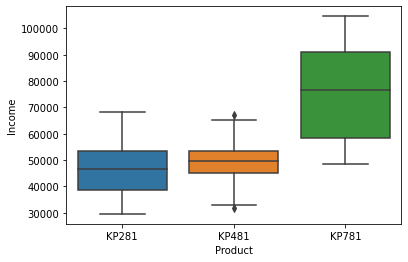

In [342]:
sns.boxplot(data=df, x = 'Product', y = 'Income')
plt.show()

**Observations** : 
- KP781 Treadmill with advanced features is preffered by the customers with higher income.
- KP281 Treadmill with the lowest cost and basic features is preffered by the customers with lower income and the KP481 product with moderate features are liked by the customers with upper bracket of low - moderate income group.

**Inference** : 
- There aren't any significant outliers for Products and the Income of customers purchasing those products. So no need for outlier removal here.
- The target audience for KP781 Treadmill should be the higher income group. So the sales team must focus on this range.

In [87]:
#Boxplot for Gender and the Income of customers purchasing products

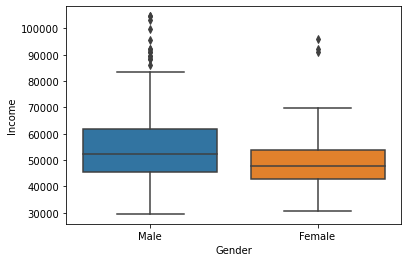

In [343]:
sns.boxplot(data=df, x = 'Gender', y = 'Income')
plt.show()

In [89]:
# Outliers detection and removal

In [344]:
df.groupby('Gender')['Income'].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

In [347]:
# we have used shallow copy of our dataframe for storing it's modified version after removing autliers
q1=df['Income'].quantile(.25)
q2=df['Income'].median()
q3=df['Income'].quantile(.75)
iqr=q3-q1 
df_scopy=df[(df['Income']>q1-1.5*iqr)&(df['Income']<q3+1.5*iqr)]
df_scopy.shape

(161, 9)

In [346]:
df.shape

(180, 9)

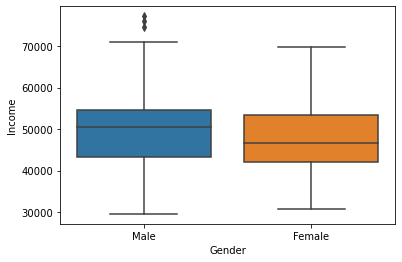

In [348]:
sns.boxplot(data=df_scopy, x = 'Gender', y = 'Income')
plt.show()

**Observations**:
- After outlier removal, 19 rows are deleted and in order to draw some insights from the original data in future, stored the modied data in it's shallow copy - **df_scopy**
- In the boxplot, we can clearly see that most of the outliers are removed and the data is now ready for further analysis and inferences.


In [349]:
df_scopy.mean()

Age             28.155280
Education       15.347826
Usage            3.273292
Fitness          3.142857
Income       49119.180124
Miles           93.260870
dtype: float64

In [350]:
df_scopy.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       48891.0
Miles           85.0
dtype: float64

In [110]:
# Difference in the mean and median of Income before removing outliers

In [353]:
diff_org = round(df['Income'].mean()-df['Income'].median(),2)
diff_org

3123.08

In [218]:
# Difference in the mean and median of Income after removing outliers

In [354]:
diff_new = round(df_scopy['Income'].mean()-df_scopy['Income'].median(),2)
diff_new

228.18

In [355]:
diff_in_income = round((diff_new/diff_org) *100,2)
diff_in_income

7.31

**Inference** : From above, we can infer that, there's a 7.31% correction in the Income data after removing outliers as we can see that the difference in the mean and median has decreased from 3123 to 228. Hence the new dataframe i.e **df_scopy**is more suitable for carrying further analysis w.r.t income and gender related cases.

**Derived Category columns**
- Unit Product Price
- Age Groups
- Age Category

In [137]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [315]:
Product_Price = {'KP281' : '1500',
                'KP481' : '1750',
                'KP781' : '2500'}

In [316]:
df['Unit Product Price'] = df['Product'].replace(to_replace = Product_Price )
df['Unit Product Price'].value_counts()

1500    80
1750    60
2500    21
Name: Unit Product Price, dtype: int64

In [317]:
price = df['Unit Product Price'].unique()
price

array(['1500', '1750', '2500'], dtype=object)

In [318]:
quantity = df['Unit Product Price'].value_counts()
quantity

1500    80
1750    60
2500    21
Name: Unit Product Price, dtype: int64

In [295]:
for i in range(len(price)):
    tot_sale_USD = quantity[i] * int(price[i])
    print("Total sales for Aerofit treadmills of unit price ${} is ${}".format(int(price[i]),tot_sale_USD))    

Total sales for Aerofit treadmills of unit price $1500 is $120000
Total sales for Aerofit treadmills of unit price $1750 is $105000
Total sales for Aerofit treadmills of unit price $2500 is $52500


In [297]:
bins=[0,14,24,40,64,100]       
label1=['0-14','15-24','25-40','41-64','65-100']
label2=['Children',"Youth", "Young Adults","Old Adults","Seniors"]
df['Age Groups']=pd.cut(df['Age'],bins,labels = label1)
df['Age Category']=pd.cut(df['Age'],bins,labels = label2)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Unit Product Price,Age Groups,Age Category
0,KP281,18,Male,14,Single,3,4,29562,112,1500,15-24,Youth
1,KP281,19,Male,15,Single,2,3,31836,75,1500,15-24,Youth
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,15-24,Youth
3,KP281,19,Male,12,Single,3,3,32973,85,1500,15-24,Youth
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,15-24,Youth


**Checking correlation among different factors using heat maps or pair plots.**

In [298]:
df['Age Category'].value_counts()

Young Adults    99
Youth           54
Old Adults       8
Children         0
Seniors          0
Name: Age Category, dtype: int64

In [300]:
df_age_new = df
bins=[14,24,40,64]       
label1=['14-24','25-40','41-64']
label2=["Youth", "Young Adults","Old Adults"]
df_age_new['Age Groups']=pd.cut(df_age_new['Age'],bins,labels = label1)
df_age_new['Age Category']=pd.cut(df_age_new['Age'],bins,labels = label2)
df_age_new.shape

(161, 12)

In [259]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


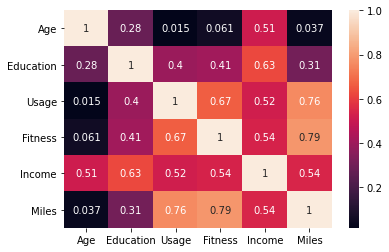

In [260]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Income'>

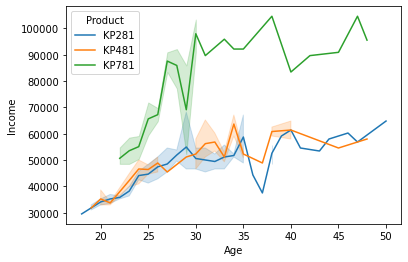

In [261]:
sns.lineplot(x='Age',y='Income',  data=df_old,  hue='Product')

<AxesSubplot:xlabel='Age', ylabel='Income'>

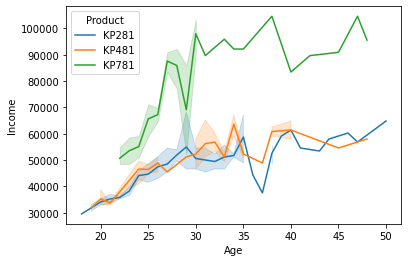

In [262]:
sns.lineplot(x='Age',y='Income',  data=df,  hue='Product')

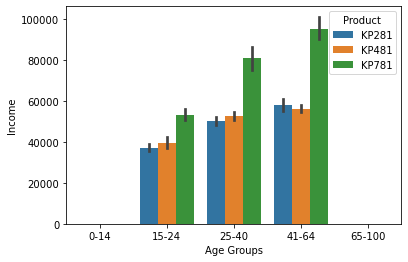

In [263]:
sns.barplot(x='Age Groups',  y='Income',hue='Product',  data=df)
plt.show()

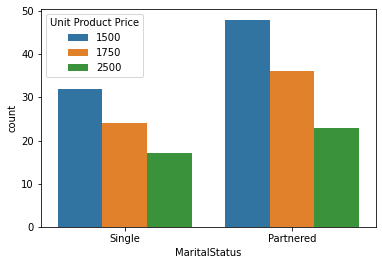

In [264]:
sns.countplot(x='MaritalStatus',
    hue='Unit Product Price',
    data=df)
plt.show()
#CONC

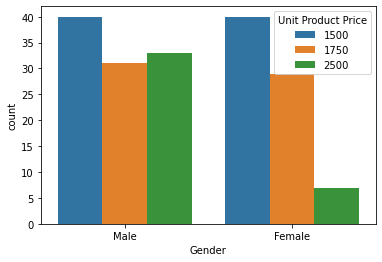

In [265]:

sns.countplot(x='Gender',
    hue='Unit Product Price',
    data=df)
plt.show()
#CONC

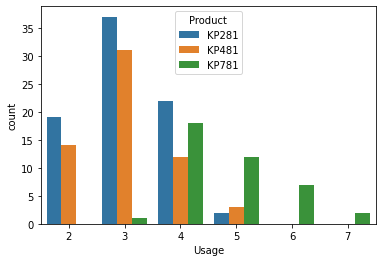

In [164]:
sns.countplot(x='Usage',
    hue='Product',
    data=df_old)
plt.show()
#CONC

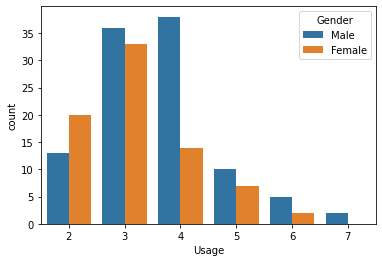

In [88]:
sns.countplot(x='Usage',
    hue='Gender',
    data=df)
plt.show()
#CONC

**Observations and Inferences**:
- From above countplot for Usage , we can clearly see that, as the no. of usage per week of a customer increases (goes beyond 3), then only there's a demand of treadmill with advanced features and highest cost(KP781-> USD 2500) which implies that if a customer is serious and is regular in running, then only he/she prefer purchasing advanced tredmill
- As the seriousness / regularity in terms of usage per week of the customer increases, they prefers treadmill with advanced features rather than low and middle range product. Which implies, Aerofit, should focus selling more advance range products to the serious customers i.e target audience should be (gym freaks, health coaches, yoga coaches, fitness enthusiast, etc)

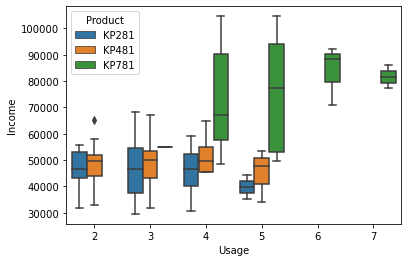

In [161]:
sns.boxplot(x='Usage',
            y = 'Income',
    hue='Product',
    data=df_old)
plt.show()
#CONC

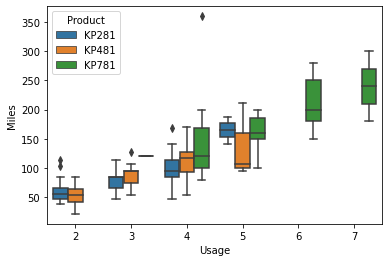

In [155]:
sns.boxplot(x='Usage',
            y = 'Miles',
    hue='Product',
    data=df_old)
plt.show()
#CONC

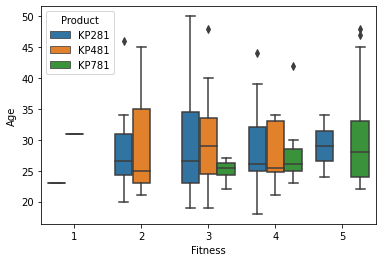

In [160]:
sns.boxplot(x='Fitness',
            y = 'Age',
    hue='Product',
    data=df_old)
plt.show()
#CONC

**Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)**

df.info()

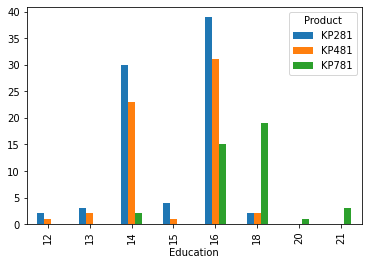

In [157]:
pd.crosstab(df_old['Education'] ,df_old['Product']).plot(kind= 'bar')
# plt.xlim(2000,2020)
# plt.xlabel('Post 2000 Release years')
plt.show()

In [61]:
pd.crosstab(df['Product'] ,df['Usage'])
# plt.xlim(2000,2020)
# plt.xlabel('Post 2000 Release years')
plt.show()

- Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

- With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
- Customer Profiling - Categorization of users.
- Probability- marginal, conditional probability.

In [266]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [267]:
marg_prob = round(pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)*100,2)
marg_prob

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.22,16.11,3.89,42.22
Male,22.22,17.22,18.33,57.78
All,44.44,33.33,22.22,100.00


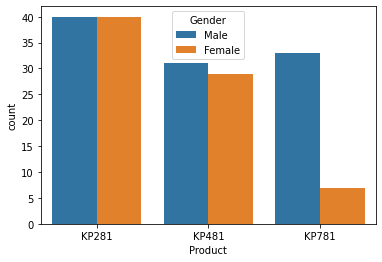

In [268]:
sns.countplot(x='Product',hue='Gender',data=df)
plt.show()

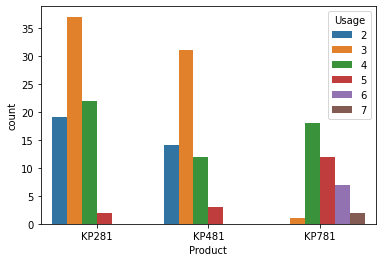

In [269]:
sns.countplot(x='Product',hue='Usage',data=df)
plt.show()

In [270]:
#top product usage is more among people who are buying it

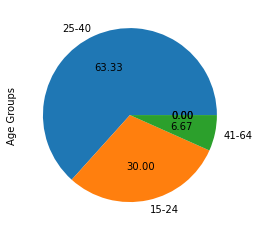

In [276]:
df['Age Groups'].value_counts().plot(kind = 'pie',autopct='%.2f')
plt.show()

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Product             180 non-null    object  
 1   Age                 180 non-null    int64   
 2   Gender              180 non-null    object  
 3   Education           180 non-null    int64   
 4   MaritalStatus       180 non-null    object  
 5   Usage               180 non-null    int64   
 6   Fitness             180 non-null    int64   
 7   Income              180 non-null    int64   
 8   Miles               180 non-null    int64   
 9   Unit Product Price  180 non-null    object  
 10  Age Groups          180 non-null    category
 11  Age Category        180 non-null    category
dtypes: category(2), int64(6), object(4)
memory usage: 15.0+ KB


In [279]:
df['Age Category'].value_counts()

Young Adults    114
Youth            54
Old Adults       12
Children          0
Seniors           0
Name: Age Category, dtype: int64

In [301]:
df_age = df_age_new.groupby('Age Category')[['Income']].count()
df_age

,Income
Age Category,
Youth,54
Young Adults,99
Old Adults,8


In [305]:
df.groupby(['Gender','MaritalStatus','Product'])['Miles']

In [314]:
df_cond_prob = df_age_new.groupby(['Gender','Age Category','Product']).sum()['Income'].unstack()
df_cond_prob.reset_index()

Product,Gender,Age Category,KP281,KP481,KP781
0,Female,Youth,483225,288798,105827
1,Female,Young Adults,1174521,1141959,130727
2,Female,Old Adults,183057,0,0
3,Male,Youth,520746,385443,427145
4,Male,Young Adults,1187028,1009656,592628
5,Male,Old Adults,164865,112563,0


In [311]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]